In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training (1).csv


In [3]:
df=pd.read_csv('twitter_training.csv')

In [4]:
df.head()

,Tweet ID,name,p/n,Sentiment_n
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
L_Sentiment = LabelEncoder()

In [11]:
df['Sentiment_num'] = L_Sentiment.fit_transform(df['p/n'])
df

,Tweet ID,name,p/n,Sentiment_n,Sentiment_num
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,3
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,3
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,3
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,3
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,3
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,3
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,3
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,3
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,3


In [12]:
df = df.fillna('ffill')

In [13]:
df = df.drop(['Tweet ID', 'name','p/n'], axis='columns')
df

,Sentiment_n,Sentiment_num
0,im getting on borderlands and i will murder yo...,3
1,I am coming to the borders and I will kill you...,3
2,im getting on borderlands and i will kill you ...,3
3,im coming on borderlands and i will murder you...,3
4,im getting on borderlands 2 and i will murder ...,3
...,...,...
74677,Just realized that the Windows partition of my...,3
74678,Just realized that my Mac window partition is ...,3
74679,Just realized the windows partition of my Mac ...,3
74680,Just realized between the windows partition of...,3


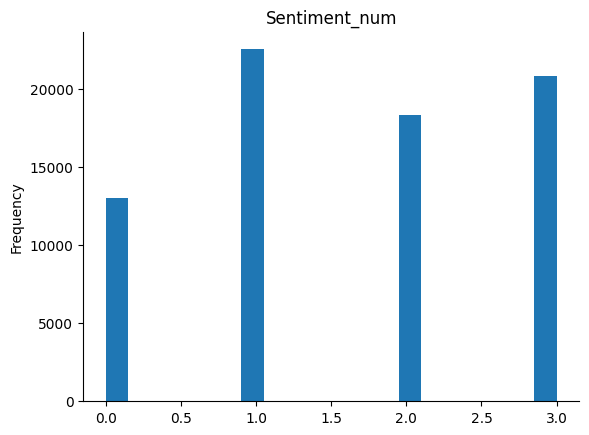

In [27]:
from matplotlib import pyplot as plt
df['Sentiment_num'].plot(kind='hist', bins=20, title='Sentiment_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
output = df[['Sentiment_num']]
output

,Sentiment_num
0,3
1,3
2,3
3,3
4,3
...,...
74677,3
74678,3
74679,3
74680,3


In [17]:
inputs = df.drop(["Sentiment_num"], axis="columns")

In [18]:
inputs

,Sentiment_n
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
inputs = vectorizer.fit_transform(inputs['Sentiment_n'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2)

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
y_pred

array([0, 3, 1, ..., 2, 1, 2])

In [25]:
classifier.score(X_test, y_test)

0.717279239472451